In [2]:
from fcmpy import ExpertFcm, FcmSimulator, FcmIntervention
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import itertools
import networkx as nx
import dataframe_image as dfi
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
# define paths
data_path = 'data'
output_path = 'output'

# set parent folder as working directory
os.chdir('..')
os.getcwd()

'c:\\Users\\isaldiviagonzatti\\Downloads\\gitFiles\\MScThesisCode\\FCM'

In [4]:
pd.options.display.max_columns = 100

In [5]:
fcm = ExpertFcm()

In [6]:
fcm.linguistic_terms = {
                        '-VH': [-1, -1, -0.75],
                        '-H': [-1, -0.75, -0.50],
                        '-M': [-0.75, -0.5, -0.25], 
                        '-L': [-0.5, -0.25, 0],
                        '-VL': [-0.25, 0, 0],
                        'NA': [-0.001, 0, 0.001],
                        '+VL': [0, 0, 0.25],
                        '+L': [0, 0.25, 0.50],
                        '+M': [0.25, 0.5, 0.75],
                        '+H': [0.5, 0.75, 1],
                        '+VH': [0.75, 1, 1]
                        }

fcm.universe = np.arange(-1, 1.05, .05)

fcm.fuzzy_membership = fcm.automf(method='trimf')

In [7]:
data = fcm.read_data(file_path= os.path.join(output_path,'expertsR.xlsx'))

In [8]:
print(list(data.keys()),type(data))

['expert1', 'expert2', 'expert3', 'expert4', 'expert5', 'expert6', 'expert7', 'expert8'] <class 'collections.OrderedDict'>


In [9]:
entropy = fcm.entropy(data)
entropy

Entropy
From                       To                                  
academia                   innovation                  1.905639
agrochemicalsUse           pollution                   1.405639
businessRisk               innovation                  2.155639
collabComms                innovation                  0.954434
communityHealth            industryImage               1.298795
companySize                funding                     1.905639
                           pineappleProdProfitability  1.905639
costFFmaterials            palProductsDemand           2.155639
                           pineappleProdProfitability  1.905639
employment                 communityHealth             1.405639
                           funding                     2.155639
fieldExtraction            agrochemicalsUse            1.500000
                           innovation                  2.155639
                           palValorization             2.155639
funding                    academia                    1.405639
                           innovation                  1.811278
govtPresence               collabComms                 1.750000
                           stubbleMgmtRegulation       1.750000
greenConsumers             agrochemicalsUse            2.155639
                           palProductsDemand           1.905639
importRegulations          agrochemicalsUse            1.561278
industryCustoms            palValorization             2.405639
industryImage              funding                     2.155639
industrySustainability     palProductsDemand           1.905639
industryTransparency       collabComms                 1.750000
innovation                 fieldExtraction             1.298795
                           laborProductivity           1.905639
                           palValorization             1.561278
intInstability             costFFmaterials             1.561278
laborProductivity          fieldExtraction             2.500000
landAvailable              pineappleProdProductivity   2.155639
palProductsDemand          innovation                  1.561278
                           palValorization             1.500000
palValorization            agrochemicalsUse            2.155639
                           fieldExtraction             1.405639
                           industrySustainability      1.500000
                           landAvailable               1.561278
                           pineappleProdProfitability  2.000000
                           soilFertil                  1.561278
                           stableFly                   2.155639
pineappleProdProductivity  pineappleProdProfitability  1.405639
pineappleProdProfitability industrySustainability      1.750000
pollution                  communityHealth             1.061278
rain                       fieldExtraction             2.155639
stableFly                  communityHealth             1.405639
                           ranchersProductivity        1.750000
stubbleMgmtRegulation      agrochemicalsUse            2.500000
                           industrySustainability      1.905639
                           innovation                  1.500000
                           palValorization             1.750000
                           stableFly                   1.750000
unevenTerrain              fieldExtraction             2.405639

In [10]:
stats_entropy = entropy['Entropy'].describe()
print(stats_entropy)

count    52.000000
mean      1.793164
std       0.361031
min       0.954434
25%       1.500000
50%       1.750000
75%       2.155639
max       2.500000
Name: Entropy, dtype: float64


In [11]:
print(entropy.style.to_latex())

\begin{tabular}{llr}
 &  & Entropy \\
From & To &  \\
academia & innovation & 1.905639 \\
agrochemicalsUse & pollution & 1.405639 \\
businessRisk & innovation & 2.155639 \\
collabComms & innovation & 0.954434 \\
communityHealth & industryImage & 1.298795 \\
\multirow[c]{2}{*}{companySize} & funding & 1.905639 \\
 & pineappleProdProfitability & 1.905639 \\
\multirow[c]{2}{*}{costFFmaterials} & palProductsDemand & 2.155639 \\
 & pineappleProdProfitability & 1.905639 \\
\multirow[c]{2}{*}{employment} & communityHealth & 1.405639 \\
 & funding & 2.155639 \\
\multirow[c]{3}{*}{fieldExtraction} & agrochemicalsUse & 1.500000 \\
 & innovation & 2.155639 \\
 & palValorization & 2.155639 \\
\multirow[c]{2}{*}{funding} & academia & 1.405639 \\
 & innovation & 1.811278 \\
\multirow[c]{2}{*}{govtPresence} & collabComms & 1.750000 \\
 & stubbleMgmtRegulation & 1.750000 \\
\multirow[c]{2}{*}{greenConsumers} & agrochemicalsUse & 2.155639 \\
 & palProductsDemand & 1.905639 \\
importRegulations & agroch

In [12]:
entropy.reset_index(inplace=True)

In [13]:
# convert entropy list to matrix (only useful if not to many variables to make some sort of heat map)
t1 = pd.crosstab(entropy['From'], entropy['To'], values=entropy['Entropy'], aggfunc='sum')
t2 = pd.crosstab(entropy['To'], entropy['From'], values=entropy['Entropy'], aggfunc='sum')
df1 = t1.combine_first(t2)
df1

,academia,agrochemicalsUse,businessRisk,collabComms,communityHealth,companySize,costFFmaterials,employment,fieldExtraction,funding,govtPresence,greenConsumers,importRegulations,industryCustoms,industryImage,industrySustainability,industryTransparency,innovation,intInstability,laborProductivity,landAvailable,palProductsDemand,palValorization,pineappleProdProductivity,pineappleProdProfitability,pollution,rain,ranchersProductivity,soilFertil,stableFly,stubbleMgmtRegulation,unevenTerrain
academia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.405639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.905639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agrochemicalsUse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,NaN,NaN,2.155639,1.561278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.155639,NaN,NaN,1.405639,NaN,NaN,NaN,NaN,2.500000,NaN
businessRisk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.155639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collabComms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,NaN,NaN,NaN,NaN,NaN,1.75,0.954434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
communityHealth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.405639,NaN,NaN,NaN,NaN,NaN,NaN,1.298795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.061278,NaN,NaN,NaN,1.405639,NaN,NaN
companySize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.905639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.905639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
costFFmaterials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.561278,NaN,NaN,2.155639,NaN,NaN,1.905639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment,NaN,NaN,NaN,NaN,1.405639,NaN,NaN,NaN,NaN,2.155639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fieldExtraction,NaN,1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.155639,NaN,2.500000,NaN,NaN,2.155639,NaN,NaN,NaN,2.155639,NaN,NaN,NaN,NaN,2.405639
funding,1.405639,NaN,NaN,NaN,NaN,1.905639,NaN,2.155639,NaN,NaN,NaN,NaN,NaN,NaN,2.155639,NaN,NaN,1.811278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#weight_matrix = fcm.build(data=data, implication_method='Larsen')

In [15]:
weight_matrix = fcm.build(data=data, implication_method = 'Mamdani', aggregation_method = 'fMax', defuzz_method='centroid')
#we realized that three connections were missing in the questionnaire. These were all positive (acc. to interviews)
#so they were set to positive 0.5 in the matrix to simulate a positive average response.
weight_matrix.at['palProductsDemand','businessRisk']=-0.5
weight_matrix.at['palValorization','employment']=0.5
weight_matrix.at['pineappleProdProfitability','industryCustoms']=0.5
weight_matrixS=weight_matrix.round(2)
weight_matrixS.to_csv(os.path.join(output_path,'matrixFCM.csv'))
weight_matrix

,academia,agrochemicalsUse,businessRisk,collabComms,communityHealth,companySize,costFFmaterials,employment,fieldExtraction,funding,govtPresence,greenConsumers,importRegulations,industryCustoms,industryImage,industrySustainability,industryTransparency,innovation,intInstability,laborProductivity,landAvailable,palProductsDemand,palValorization,pineappleProdProductivity,pineappleProdProfitability,pollution,rain,ranchersProductivity,soilFertil,stableFly,stubbleMgmtRegulation,unevenTerrain
academia,0.000000,0.000000,0.0,0.000000,0.000000,0,0.00000,0.0,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0,0.597359,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0
agrochemicalsUse,0.000000,0.000000,0.0,0.000000,0.000000,0,0.00000,0.0,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.746418,0,0.000000,0.00000,0.000000,0.000000,0
businessRisk,0.000000,0.000000,0.0,0.000000,0.000000,0,0.00000,0.0,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0,-0.541581,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0
collabComms,0.000000,0.000000,0.0,0.000000,0.000000,0,0.00000,0.0,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0,0.766981,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0
communityHealth,0.000000,0.000000,0.0,0.000000,0.000000,0,0.00000,0.0,0.000000,0.000000,0,0,0,0.0,0.787485,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0
companySize,0.000000,0.000000,0.0,0.000000,0.000000,0,0.00000,0.0,0.000000,0.651208,0,0,0,0.0,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.651208,0.000000,0,0.000000,0.00000,0.000000,0.000000,0
costFFmaterials,0.000000,0.000000,0.0,0.000000,0.000000,0,0.00000,0.0,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0.577191,0.000000,0.000000,-0.504871,0.000000,0,0.000000,0.00000,0.000000,0.000000,0
employment,0.000000,0.000000,0.0,0.000000,0.643939,0,0.00000,0.0,0.000000,0.608288,0,0,0,0.0,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0
fieldExtraction,0.000000,-0.745025,0.0,0.000000,0.000000,0,0.00000,0.0,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0,0.608288,0,0.000000,0.000000,0.000000,0.610423,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0
funding,0.668483,0.000000,0.0,0.000000,0.000000,0,0.00000,0.0,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0,0.606017,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000,0


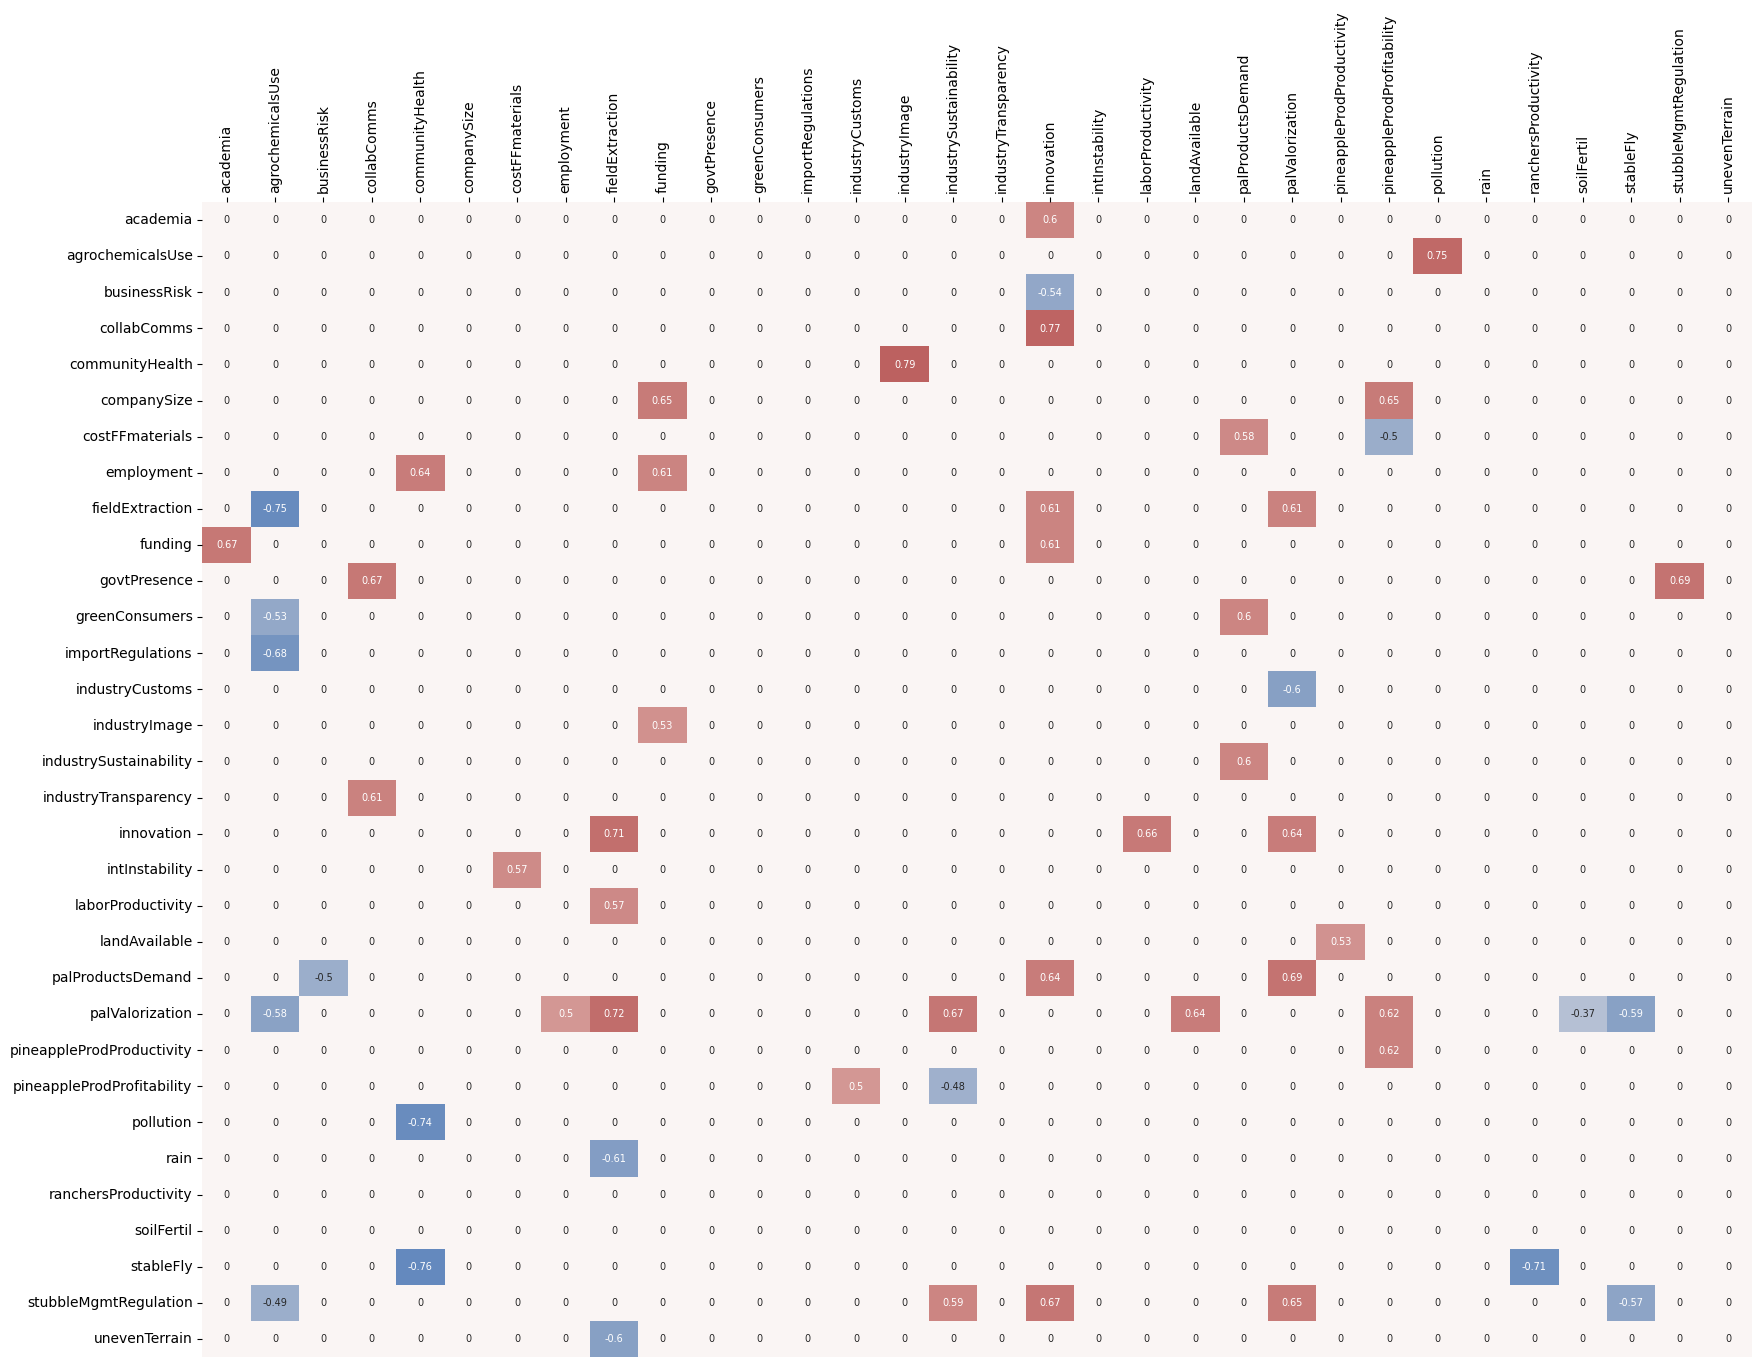

In [16]:
plt.subplots(figsize=(20,15))
ax=sns.heatmap(weight_matrix, annot=True, annot_kws={"size":7 }, cbar=False, vmin=-1, vmax=1, cmap="vlag")
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_path,"matrixFCM.svg"))

In [17]:
#trying to plot FCM with networkx
#G =  nx.from_pandas_adjacency(weight_matrix, create_using=nx.DiGraph)
#nx.draw(G)

In [18]:
degree=pd.DataFrame(columns=['Indegree', 'Outdegree', 'Centrality'])
degree.Indegree= weight_matrix.abs().sum()
degree.Outdegree=weight_matrix.abs().sum(axis=1)
degree.Centrality = degree.Indegree + degree.Outdegree 
degree.sort_values("Centrality",ascending=False, inplace=True)
degree=degree.round(decimals = 2)
print(degree.style.to_latex())

\begin{tabular}{lrrr}
 & Indegree & Outdegree & Centrality \\
palValorization & 3.190000 & 4.690000 & 7.880000 \\
innovation & 4.440000 & 2.020000 & 6.450000 \\
fieldExtraction & 3.220000 & 1.960000 & 5.180000 \\
agrochemicalsUse & 3.030000 & 0.750000 & 3.780000 \\
stubbleMgmtRegulation & 0.690000 & 2.980000 & 3.680000 \\
palProductsDemand & 1.770000 & 1.830000 & 3.600000 \\
pineappleProdProfitability & 2.390000 & 0.980000 & 3.370000 \\
funding & 1.790000 & 1.270000 & 3.070000 \\
communityHealth & 2.150000 & 0.790000 & 2.930000 \\
stableFly & 1.160000 & 1.480000 & 2.630000 \\
industrySustainability & 1.750000 & 0.600000 & 2.350000 \\
collabComms & 1.280000 & 0.770000 & 2.040000 \\
employment & 0.500000 & 1.250000 & 1.750000 \\
costFFmaterials & 0.570000 & 1.080000 & 1.650000 \\
pollution & 0.750000 & 0.740000 & 1.490000 \\
govtPresence & 0.000000 & 1.360000 & 1.360000 \\
industryImage & 0.790000 & 0.530000 & 1.320000 \\
companySize & 0.000000 & 1.300000 & 1.300000 \\
academia & 0.67000

In [19]:
#count of senders and receivers
print(degree['Indegree'].value_counts()[0], degree['Outdegree'].value_counts()[0])

8 2


In [20]:
#check if a column is empty
weight_matrix.columns[weight_matrix.isna().any()].tolist()

[]

In [21]:
listC=weight_matrix.columns.tolist()
print(listC, len(listC))

['academia', 'agrochemicalsUse', 'businessRisk', 'collabComms', 'communityHealth', 'companySize', 'costFFmaterials', 'employment', 'fieldExtraction', 'funding', 'govtPresence', 'greenConsumers', 'importRegulations', 'industryCustoms', 'industryImage', 'industrySustainability', 'industryTransparency', 'innovation', 'intInstability', 'laborProductivity', 'landAvailable', 'palProductsDemand', 'palValorization', 'pineappleProdProductivity', 'pineappleProdProfitability', 'pollution', 'rain', 'ranchersProductivity', 'soilFertil', 'stableFly', 'stubbleMgmtRegulation', 'unevenTerrain'] 32


In [22]:
#set initial values to 0
v = 0
init_state = {k:v for k in listC}
initialStateV=pd.DataFrame(init_state, index=[0])
initialStateV.to_csv(os.path.join(output_path,'initialStateV.csv'))
print(init_state)

{'academia': 0, 'agrochemicalsUse': 0, 'businessRisk': 0, 'collabComms': 0, 'communityHealth': 0, 'companySize': 0, 'costFFmaterials': 0, 'employment': 0, 'fieldExtraction': 0, 'funding': 0, 'govtPresence': 0, 'greenConsumers': 0, 'importRegulations': 0, 'industryCustoms': 0, 'industryImage': 0, 'industrySustainability': 0, 'industryTransparency': 0, 'innovation': 0, 'intInstability': 0, 'laborProductivity': 0, 'landAvailable': 0, 'palProductsDemand': 0, 'palValorization': 0, 'pineappleProdProductivity': 0, 'pineappleProdProfitability': 0, 'pollution': 0, 'rain': 0, 'ranchersProductivity': 0, 'soilFertil': 0, 'stableFly': 0, 'stubbleMgmtRegulation': 0, 'unevenTerrain': 0}


In [23]:
sim = FcmSimulator()

In [24]:
res = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='sigmoid', inference='mKosko', thresh=0.001, iterations=50, l=1)
res

The values converged in the 10 state (e <= 0.001)


,academia,agrochemicalsUse,businessRisk,collabComms,communityHealth,companySize,costFFmaterials,employment,fieldExtraction,funding,govtPresence,greenConsumers,importRegulations,industryCustoms,industryImage,industrySustainability,industryTransparency,innovation,intInstability,laborProductivity,landAvailable,palProductsDemand,palValorization,pineappleProdProductivity,pineappleProdProfitability,pollution,rain,ranchersProductivity,soilFertil,stableFly,stubbleMgmtRegulation,unevenTerrain
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.500000,0.500000,0.500000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,0.0,0.0,0.0,0.500000,0.500000,0.500000,0.0,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,0.0
2,0.697251,0.399244,0.562177,0.622459,0.517715,0.0,0.622459,0.679179,0.818284,0.744833,0.0,0.0,0.0,0.679179,0.709662,0.709725,0.0,0.898100,0.0,0.696346,0.694320,0.747868,0.817303,0.681982,0.703968,0.705413,0.0,0.535788,0.578315,0.480544,0.622459,0.0
3,0.767663,0.270782,0.546922,0.650778,0.516682,0.0,0.650778,0.747973,0.920480,0.823038,0.0,0.0,0.0,0.737141,0.753498,0.784576,0.0,0.965640,0.0,0.783981,0.771719,0.822168,0.917501,0.740207,0.788742,0.731730,0.0,0.548116,0.568889,0.412622,0.650778,0.0
4,0.788824,0.219727,0.533907,0.657186,0.535512,0.0,0.657186,0.769719,0.938305,0.842975,0.0,0.0,0.0,0.756118,0.761401,0.803931,0.0,0.974711,0.0,0.805530,0.795702,0.841104,0.934002,0.758774,0.815457,0.717855,0.0,0.563120,0.557493,0.378494,0.657186,0.0
5,0.794512,0.206802,0.528309,0.658628,0.552652,0.0,0.658628,0.774993,0.941058,0.847861,0.0,0.0,0.0,0.762031,0.765506,0.807289,0.0,0.976451,0.0,0.809807,0.801263,0.845621,0.936372,0.764434,0.822159,0.707208,0.0,0.572774,0.553178,0.367397,0.658628,0.0
6,0.795970,0.204018,0.526350,0.658952,0.561749,0.0,0.658952,0.776117,0.941509,0.849183,0.0,0.0,0.0,0.763707,0.768651,0.807692,0.0,0.976856,0.0,0.810642,0.802387,0.846579,0.936710,0.765976,0.823753,0.702988,0.0,0.577067,0.551895,0.364310,0.658952,0.0
7,0.796350,0.203454,0.525742,0.659025,0.565512,0.0,0.659025,0.776341,0.941590,0.849654,0.0,0.0,0.0,0.764153,0.770479,0.807700,0.0,0.976957,0.0,0.810811,0.802600,0.846759,0.936754,0.766358,0.824129,0.701672,0.0,0.578652,0.551547,0.363506,0.659025,0.0
8,0.796462,0.203343,0.525568,0.659041,0.566861,0.0,0.659041,0.776384,0.941605,0.849857,0.0,0.0,0.0,0.764267,0.771326,0.807685,0.0,0.976985,0.0,0.810847,0.802638,0.846788,0.936758,0.766447,0.824216,0.701308,0.0,0.579177,0.551457,0.363305,0.659041,0.0
9,0.796503,0.203322,0.525521,0.659045,0.567303,0.0,0.659045,0.776392,0.941608,0.849944,0.0,0.0,0.0,0.764295,0.771662,0.807678,0.0,0.976993,0.0,0.810855,0.802645,0.846792,0.936758,0.766466,0.824236,0.701214,0.0,0.579341,0.551434,0.363256,0.659045,0.0


In [25]:
#drop columns that go to zero to not plot them
resPlot=res.drop(res.columns[res.iloc[-1,:]==0],axis=1)

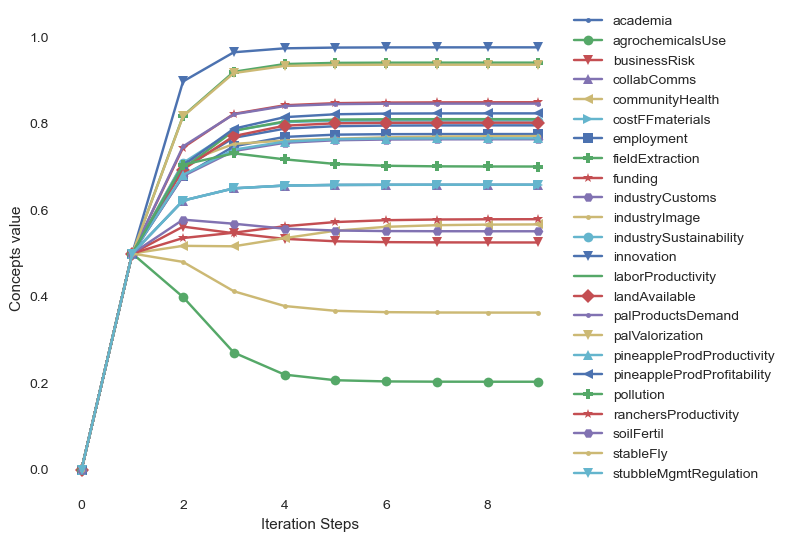

In [26]:
plt.style.use('seaborn-v0_8')
mStyles = [".","o","v","^","<",">","s","P","*","H",".","o","v","+","D",".","v","^","<","P","*","H",".","v","^","<",">",]

fig, ax = plt.subplots()

for i, col in enumerate(resPlot):
    resPlot[col].plot( marker=mStyles[i], ax=ax)

ax.legend(bbox_to_anchor=(1, 1.05))
ax.grid(False)
ax.set_facecolor('white')
plt.ylabel("Concepts value")
plt.xlabel("Iteration Steps")
plt.tight_layout()
plt.savefig(os.path.join(output_path,'naturalSimulation.svg'))

In [27]:
simulationR=pd.DataFrame(res.iloc[9].sort_values(ascending=False))
simulationR.columns=['Output']

In [28]:
output=pd.merge(degree, simulationR, left_index=True, right_index=True)
output.sort_values("Output",ascending=False, inplace=True)
output=output.round(decimals = 2)
print(output.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Indegree &  Outdegree &  Centrality &  Output \\
\midrule
innovation                 &      4.44 &       2.02 &        6.45 &    0.98 \\
fieldExtraction            &      3.22 &       1.96 &        5.18 &    0.94 \\
palValorization            &      3.19 &       4.69 &        7.88 &    0.94 \\
funding                    &      1.79 &       1.27 &        3.07 &    0.85 \\
palProductsDemand          &      1.77 &       1.83 &        3.60 &    0.85 \\
pineappleProdProfitability &      2.39 &       0.98 &        3.37 &    0.82 \\
laborProductivity          &      0.66 &       0.57 &        1.23 &    0.81 \\
industrySustainability     &      1.75 &       0.60 &        2.35 &    0.81 \\
landAvailable              &      0.64 &       0.53 &        1.17 &    0.80 \\
academia                   &      0.67 &       0.60 &        1.27 &    0.80 \\
employment                 &      0.50 &       1.25 &        1.75 &    0.78 \\
industryImage              &      0

C:\Users\isaldiviagonzatti\AppData\Local\Temp\ipykernel_13668\1528711173.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(output.to_latex())


In [29]:
res.columns[res.iloc[-1,:]==0]

Index(['companySize', 'govtPresence', 'greenConsumers', 'importRegulations',
       'industryTransparency', 'intInstability', 'rain', 'unevenTerrain'],
      dtype='object')

In [30]:
## Some values go to zero. To avoid this, we add a feedback loop in themselves. 
indices=[ 'companySize', 'govtPresence', 'greenConsumers', 'importRegulations',
       'industryTransparency', 'intInstability', 'rain', 'unevenTerrain']
cols=indices.copy()

dupList=[indices, cols]
dupList

[['companySize',
  'govtPresence',
  'greenConsumers',
  'importRegulations',
  'industryTransparency',
  'intInstability',
  'rain',
  'unevenTerrain'],
 ['companySize',
  'govtPresence',
  'greenConsumers',
  'importRegulations',
  'industryTransparency',
  'intInstability',
  'rain',
  'unevenTerrain']]

In [31]:
for p in itertools.combinations(dupList, 2):
     pairs=list(zip(*p))
print(pairs)

[('companySize', 'companySize'), ('govtPresence', 'govtPresence'), ('greenConsumers', 'greenConsumers'), ('importRegulations', 'importRegulations'), ('industryTransparency', 'industryTransparency'), ('intInstability', 'intInstability'), ('rain', 'rain'), ('unevenTerrain', 'unevenTerrain')]


In [32]:
weight_matrix1=weight_matrix.copy()
for i in range(len(pairs)):
     weight_matrix1.loc[pairs[i]] = 1

In [33]:
# note business risk-business risk is now 1
weight_matrix1.head(3)

,academia,agrochemicalsUse,businessRisk,collabComms,communityHealth,companySize,costFFmaterials,employment,fieldExtraction,funding,govtPresence,greenConsumers,importRegulations,industryCustoms,industryImage,industrySustainability,industryTransparency,innovation,intInstability,laborProductivity,landAvailable,palProductsDemand,palValorization,pineappleProdProductivity,pineappleProdProfitability,pollution,rain,ranchersProductivity,soilFertil,stableFly,stubbleMgmtRegulation,unevenTerrain
academia,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0.597359,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,0.0,0
agrochemicalsUse,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.746418,0,0.0,0.0,0.0,0.0,0
businessRisk,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,-0.541581,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,0.0,0


In [34]:
# we run simulation again
res1 = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix1, transfer='sigmoid', inference='mKosko', thresh=0.001, iterations=100, l=1)

The values converged in the 10 state (e <= 0.001)


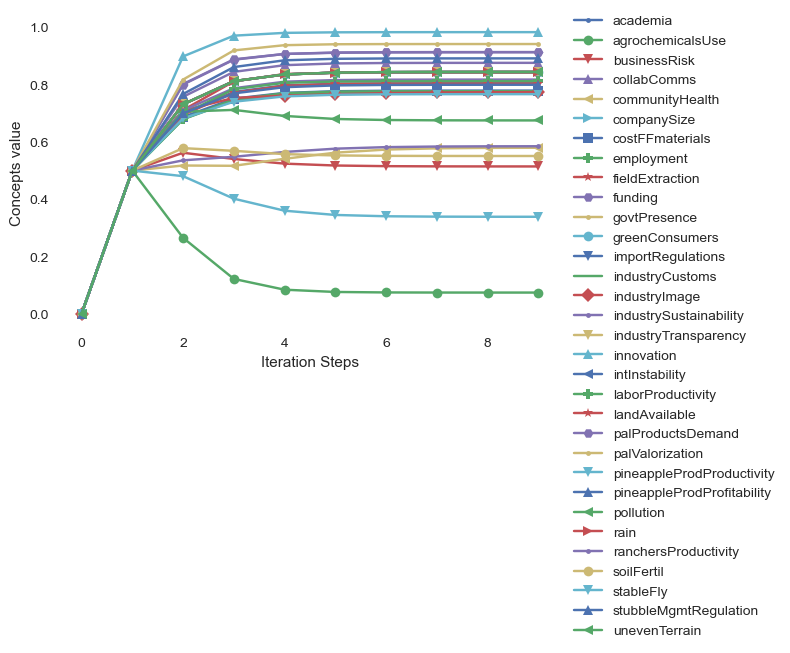

In [35]:
mStyles = [".","o","v","^","<",">","s","P","*","H",".","o","v","+","D",".","v","^","<","P","*","H",".","v","^","<",">",".","o","v","^","<",">","s"]

fig, ax = plt.subplots()

for i, col in enumerate(res1):
    res1[col].plot( marker=mStyles[i], ax=ax)

ax.legend(bbox_to_anchor=(1, 1.05))
ax.grid(False)
ax.set_facecolor('white')
plt.ylabel("Concepts value")
plt.xlabel("Iteration Steps")
plt.tight_layout()
plt.savefig(os.path.join(output_path,'selfInforcedIter.svg'))

In [36]:
compare=[res1.iloc[9],res.iloc[9], res1.columns]
for p in itertools.combinations(compare, 3):
     compare1=list(zip(*p))
compare1

[(0.8044881186502589, 0.7965026820559421, 'academia'),
 (0.07461104903314152, 0.2033216001295672, 'agrochemicalsUse'),
 (0.5144597844860863, 0.5255213968733282, 'businessRisk'),
 (0.8757437406446884, 0.659045002242483, 'collabComms'),
 (0.5796651311948795, 0.567302984214761, 'communityHealth'),
 (0.8439359553798381, 0.0, 'companySize'),
 (0.779046049663142, 0.659045002242483, 'costFFmaterials'),
 (0.7768720802424999, 0.7763920343619124, 'employment'),
 (0.8411018244161309, 0.9416083794576643, 'fieldExtraction'),
 (0.9127693678186584, 0.849943612973173, 'funding'),
 (0.8439359553798381, 0.0, 'govtPresence'),
 (0.8439359553798381, 0.0, 'greenConsumers'),
 (0.8439359553798381, 0.0, 'importRegulations'),
 (0.7715704934932122, 0.7642954110739594, 'industryCustoms'),
 (0.7737159246088424, 0.7716621305527557, 'industryImage'),
 (0.8174138155126761, 0.8076779046637125, 'industrySustainability'),
 (0.8439359553798381, 0.0, 'industryTransparency'),
 (0.9828033094712499, 0.9769927162951275, 'inno

#### All the values that before went to zero now have a positive value, but it's the same value for all of them, so it doesn't tell us much.

### Now we run intervention scenarios

In [37]:
inter = FcmIntervention(FcmSimulator)

In [38]:
inter.initialize(initial_state=init_state, weight_matrix=weight_matrix, transfer='sigmoid', inference='mKosko', thresh=0.001, iterations=50, l=1)

The values converged in the 10 state (e <= 0.001)


### Intervention with 4 different variables

In [60]:
inter.add_intervention('intervention_1', type='single_shot', initial_state={'govtPresence': 1}, effectiveness=1)
inter.add_intervention('intervention_2', type='single_shot', initial_state={'importRegulations': 1}, effectiveness=1)
inter.add_intervention('intervention_3', type='single_shot', initial_state={'greenConsumers': 1}, effectiveness=1)
inter.add_intervention('intervention_4', type='single_shot', initial_state={'industryTransparency': 1}, effectiveness=1)

In [61]:
inter.test_intervention('intervention_1', iterations=20)
inter.test_intervention('intervention_2', iterations=20)
inter.test_intervention('intervention_3', iterations=20)
inter.test_intervention('intervention_4', iterations=20)

The values converged in the 10 state (e <= 0.001)
The values converged in the 10 state (e <= 0.001)
The values converged in the 10 state (e <= 0.001)
The values converged in the 10 state (e <= 0.001)


In [62]:
inter.equilibriums

,baseline,intervention_1,intervention_2,intervention_3,intervention_4
academia,0.796503,0.796525,0.796513,0.796516,0.796503
agrochemicalsUse,0.203322,0.187829,0.104646,0.120876,0.203293
businessRisk,0.525521,0.525262,0.525521,0.514181,0.525521
collabComms,0.659045,0.814593,0.659045,0.659045,0.804597
communityHealth,0.567303,0.575112,0.572160,0.571552,0.567312
companySize,0.000000,0.000000,0.000000,0.000000,0.000000
costFFmaterials,0.659045,0.659045,0.659045,0.659045,0.659045
employment,0.776392,0.777074,0.776392,0.776702,0.776403
fieldExtraction,0.941608,0.942093,0.941608,0.941783,0.941723
funding,0.849944,0.850111,0.850016,0.850036,0.849945


In [63]:
interTable=inter.comparison_table[inter.comparison_table['baseline'].notna()]
interTable.rename(columns={'intervention_1': 'govtPresence', 'intervention_2': 'importRegulations', 
                            'intervention_3': 'greenConsumers','intervention_4': 'industryTransparency'}, inplace=True)
interTable.drop(columns=['baseline'], inplace=True)

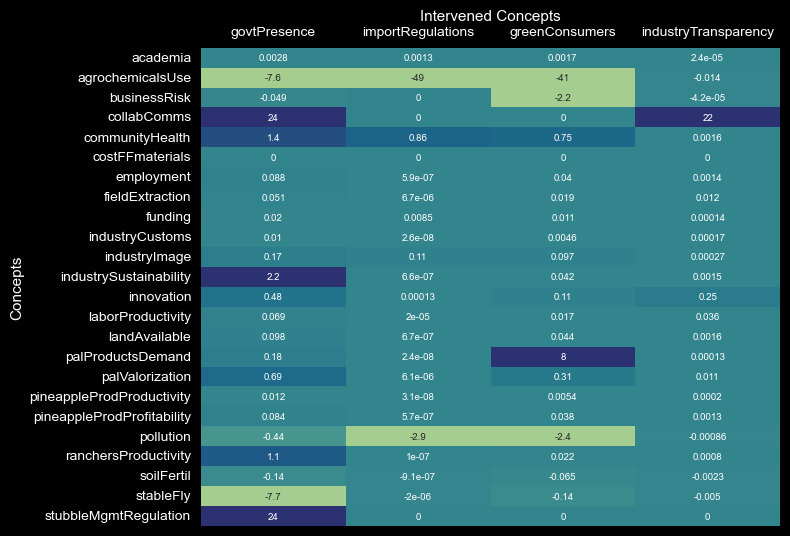

In [64]:
plt.style.use('dark_background')
ax=sns.heatmap(interTable, annot=True, annot_kws={"size": 7}, cbar=False, vmin=-2, vmax=2, cmap="crest")
ax.set(ylabel="Concepts", xlabel="Intervened Concepts")
ax.xaxis.tick_top()
plt.tight_layout()
ax.xaxis.set_label_position('top') 
plt.savefig(os.path.join(output_path,"interventionTable.svg"))

In [65]:
outcomeV=["communityHealth",'ranchersProductivity',"pineappleProdProfitability","industrySustainability"]
interBar= interTable.loc[outcomeV]
interBar=interBar.round(decimals = 2)
interBar

,govtPresence,importRegulations,greenConsumers,industryTransparency
communityHealth,1.38,0.86,0.75,0.0
ranchersProductivity,1.11,0.00,0.02,0.0
pineappleProdProfitability,0.08,0.00,0.04,0.0
industrySustainability,2.16,0.00,0.04,0.0


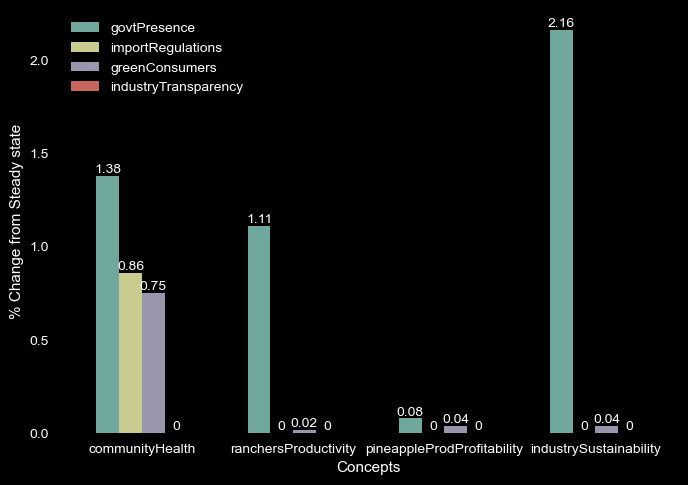

In [66]:
plt.style.use('dark_background')
ax = interBar.plot.bar(rot=0, alpha=.8, width = 0.6)
ax.set(ylabel="% Change from Steady state", xlabel="Concepts")
ax.grid(False)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.bar_label(ax.containers[2], label_type='edge')
ax.bar_label(ax.containers[3], label_type='edge')
plt.savefig(os.path.join(output_path,'interventionBar.svg'), bbox_inches='tight')
plt.show()

In [46]:
mix = FcmIntervention(FcmSimulator)

In [47]:
mix.initialize(initial_state=init_state, weight_matrix=weight_matrix, transfer='sigmoid', inference='mKosko', thresh=0.001, iterations=50, l=1)

The values converged in the 10 state (e <= 0.001)


In [48]:
#policy mix 1
mix.add_intervention('mix_1', type='single_shot', initial_state={'govtPresence': 1,'importRegulations': 1}, effectiveness=1)
#policy mix 2
mix.add_intervention('mix_2', type='single_shot', initial_state={'govtPresence': 1,'greenConsumers': 1}, effectiveness=1)
#policy mix 3
mix.add_intervention('mix_3', type='single_shot', initial_state={'govtPresence': 1,'industryTransparency': 1}, effectiveness=1)
#policy mix 4
mix.add_intervention('mix_4', type='single_shot', initial_state={'importRegulations': 1,'industryTransparency': 1}, effectiveness=1)
#policy mix 5
mix.add_intervention('mix_5', type='single_shot', initial_state={'greenConsumers': 1,'industryTransparency': 1}, effectiveness=1)
#policy mix 6
mix.add_intervention('mix_6', type='single_shot', initial_state={'greenConsumers': 1,'importRegulations': 1}, effectiveness=1)

In [49]:
mix.test_intervention('mix_1', iterations=20)
mix.test_intervention('mix_2', iterations=20)
mix.test_intervention('mix_3', iterations=20)
mix.test_intervention('mix_4', iterations=20)
mix.test_intervention('mix_5', iterations=20)
mix.test_intervention('mix_6', iterations=20)

The values converged in the 9 state (e <= 0.001)
The values converged in the 9 state (e <= 0.001)
The values converged in the 10 state (e <= 0.001)
The values converged in the 10 state (e <= 0.001)
The values converged in the 10 state (e <= 0.001)
The values converged in the 9 state (e <= 0.001)


In [50]:
outcomeV=["communityHealth",'ranchersProductivity',"pineappleProdProfitability","industrySustainability"]
mixPlot=mix.comparison_table[mix.comparison_table['baseline'].notna()]
mixBarP= mixPlot.loc[outcomeV]
mixBarP.rename(columns={'mix_1': 'govtPresence + importRegulations', 'mix_2': 'govtPresence + greenConsumers', 
                            'mix_3': 'govtPresence + industryTransparency','mix_4': 'industryTransparency + importRegulations', 
                        'mix_5': 'industryTransparency + greenConsumers', 'mix_6': 'importRegulations + greenConsumers'}, inplace=True)
mixBarP.drop(columns=['baseline'], inplace=True)
mixBarP=mixBarP.round(2)
mixBarP

,govtPresence + importRegulations,govtPresence + greenConsumers,govtPresence + industryTransparency,industryTransparency + importRegulations,industryTransparency + greenConsumers,importRegulations + greenConsumers
communityHealth,2.12,2.02,1.38,0.86,0.75,1.23
ranchersProductivity,1.08,1.10,1.11,0.00,0.02,-0.00
pineappleProdProfitability,0.08,0.12,0.08,0.00,0.04,0.04
industrySustainability,2.16,2.20,2.16,0.00,0.04,0.04


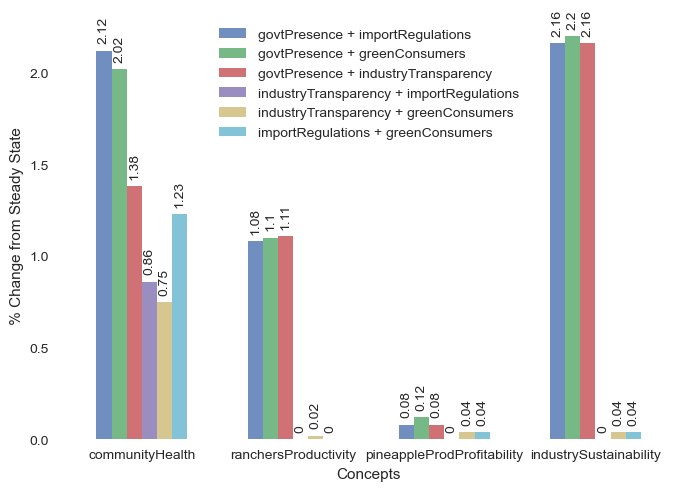

In [55]:
plt.style.use('seaborn-v0_8')
ax = mixBarP.plot.bar(rot=0, alpha=.8, width = 0.6)
ax.set(ylabel=" % Change from Steady State", xlabel="Concepts")
ax.grid(False)
ax.set_facecolor('white')
ax.bar_label(ax.containers[0], label_type='edge', rotation=90, padding=5)
ax.bar_label(ax.containers[1], label_type='edge', rotation=90, padding=5)
ax.bar_label(ax.containers[2], label_type='edge', rotation=90, padding=5)
ax.bar_label(ax.containers[3], label_type='edge', rotation=90, padding=5)
ax.bar_label(ax.containers[4], label_type='edge', rotation=90, padding=5)
ax.bar_label(ax.containers[5], label_type='edge', rotation=90, padding=5)
plt.savefig(os.path.join(output_path,'mixesOutput.svg'), bbox_inches='tight')